<a href="https://colab.research.google.com/github/rahulwarn/capstone-project-of-Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

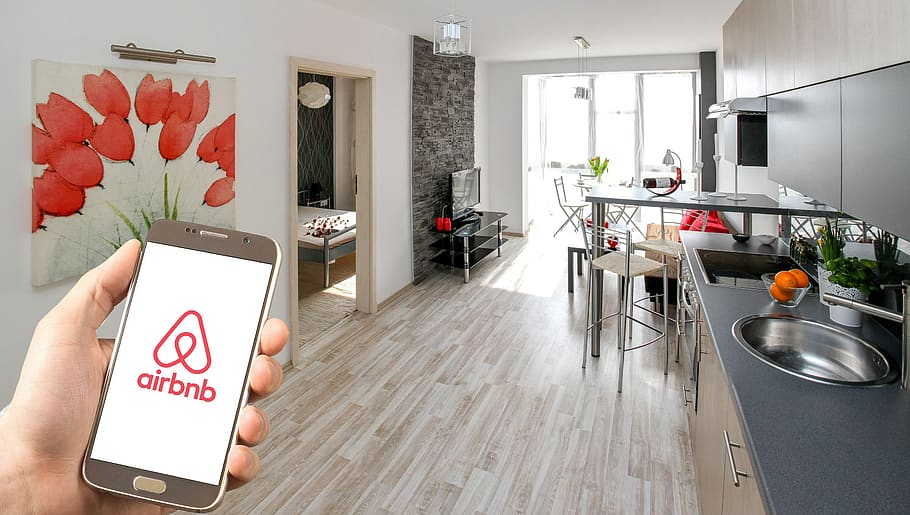

**Airbnb** is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.**Airbnb** does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

**1)** **IMPORT PANDAS AND NUMPY IN THE NOTBOOK**

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

**2)** **LOAD THE AIRBNB_DATA.CSV IN SHARED FOLDER**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3) Mount your drive and read the csv file. Make sure you are using the correct file path

In [ ]:
path = '/content/drive/MyDrive/Airbnb Capstone Project/Airbnb NYC 2019.csv'

In [ ]:
# creating dataframe for reading csv file df is our dataframe
df = pd.read_csv(path)

4)  **Print the first and last 10 rows of dataframe**

In [ ]:
# printing first 10 rows
# we can see there are null values in different columns
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
# printing last 10 rows
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **Summary about the dataframe**

In [ ]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# summary of dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# print the no of columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape #printing total number of rows and columns in dataframe

(48895, 16)

In [ ]:
#just checking:
#looks all the property ids are different and each listings are different here!

df['id'].nunique()

48895

What are the numerical and categorical variables?

A particular property name will have one particular **host_name **hosted by that same individual but a particular **host_name** can have multiple properties in a area.

**host_name** is a categorical variable here. 
Also **neighbourhood_group,neighbourhood and room_type** fall into this category.

While **id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365** are numerical variables

In [ ]:
#looking out for categorical variables
df.loc[df['name']=='Skylit Midtown Castle']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
df[df['host_name']=='Jennifer'] #experimenting

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
306,71248,Bright and lovely 1 bdrm apt in LES,363834,Jennifer,Manhattan,Chinatown,40.71659,-73.98945,Entire home/apt,125,25,43,2019-06-17,0.42,1,102
326,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.72329,-73.98486,Private room,71,2,182,2019-07-04,1.81,1,200
497,176135,Cosy Sunny 1brm in Prospect Heights,842125,Jennifer,Brooklyn,Crown Heights,40.67505,-73.95969,Entire home/apt,97,3,31,2018-10-23,0.32,1,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47972,36007006,Centrally Located 1BDR With Furnished Patio,270906714,Jennifer,Manhattan,Hell's Kitchen,40.75654,-73.99173,Entire home/apt,320,3,0,NaN,NaN,1,341
48110,36083269,"Serene Storefront Studio, a private cozy hideaway",3358348,Jennifer,Brooklyn,Crown Heights,40.67497,-73.94973,Entire home/apt,97,1,0,NaN,NaN,1,63
48164,36113257,WaHi Walk Up,22528598,Jennifer,Manhattan,Washington Heights,40.85269,-73.93616,Private room,80,1,1,2019-06-29,1.00,1,68
48511,36304817,HugeHipHome 5BR 2 Bath w/ Yard 15 min to Midtown!,143725634,Jennifer,Queens,Long Island City,40.76001,-73.93031,Entire home/apt,450,2,0,NaN,NaN,1,321


In [ ]:
df[df['host_name']=='Jennifer']['name'].nunique()

154

In [ ]:
df['neighbourhood'].nunique() #looks this can be a categorical var too. 

221

In [ ]:
df['host_name'].nunique() #unique hosts

11452

In [ ]:
df['name'].nunique() #unique listings

47905

In [ ]:
df['name'].value_counts() 
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
df[df['name']==df['host_name']] #looks there are few listings where the property name and the host have same names!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
df['host_id'].value_counts()[:4] #host ids with most listings counts

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

So, far I was trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside)

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

We'll not bother much as these are not that important in our analysis and proceed further!

In [ ]:
df.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!

In [ ]:
len(df[df['price']==0]) #so 11 property/listings have 0 price listed.

11

#if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
#name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
#these are the important ones in our analysis. 

# **Data cleaning**

In [ ]:
df.isnull().sum() # checking null values in data frama

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!
#we can fill these missing values in both with unknown & no_name respectively!

df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [ ]:
df[['host_name','name']].isnull().values.any() #looks the null values are removed!

False

Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [ ]:
df= df.drop(['last_review'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

**Checking for duplicate data**

In [ ]:
duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's<br>
makes sense right? 

In [ ]:
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
df['reviews_per_month'].isnull().values.any()

False

# Let's check the correlation matrix to understand how are the features interrelated with each other.
# **Also to get an idea which are the most important features in this data.**

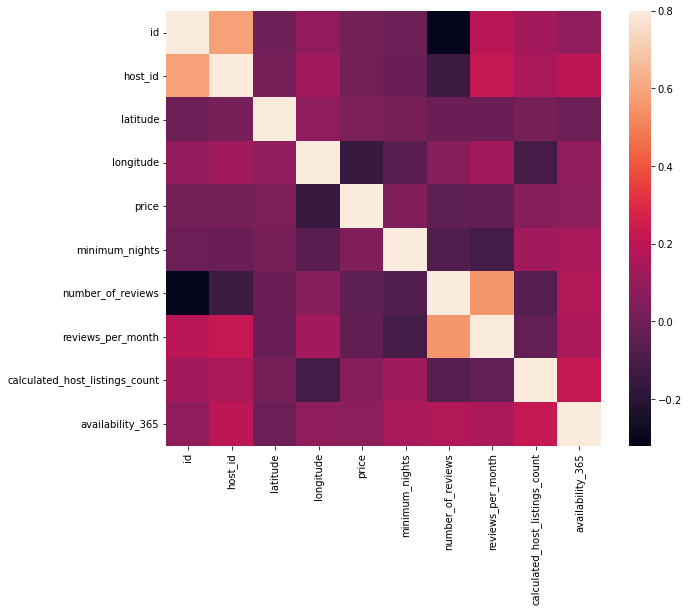

In [ ]:
#correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corrmat, vmax=.8, square=True);

we can find from the heat map the correlation between different features that can affect a airbnb listing.

 1. There's correlation among **host_id** to **reveiws_per_month** & **availability_365**. 

2.correlation between **min_nights** to **no_of_listings_count** & **availability_365**. 

 3. Price also shows some correlation with **availability_365** & **host_listings_count**.

**no_of_reviews** and **reviews_per_month** gives almost the same information. so we can carry out analysis with any of the two variable. **Also, no_of_reviews is correlated to availability_365!**

##1. What can we learn about different hosts and areas?





In [ ]:
top_5_hosts=df['host_name'].value_counts()[:5] #5 hosts with most listings counts in entire NYC

In [ ]:
top_5_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 5 hosts on the basis of no of listings in entire NYC!')

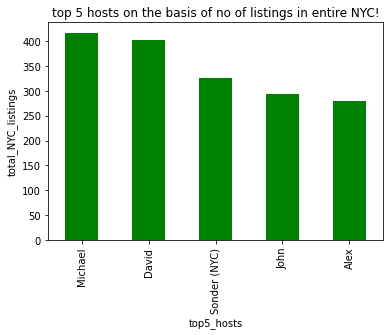

In [ ]:
top_5_hosts.plot(kind='bar',color='g')
plt.xlabel('top5_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 5 hosts on the basis of no of listings in entire NYC!')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

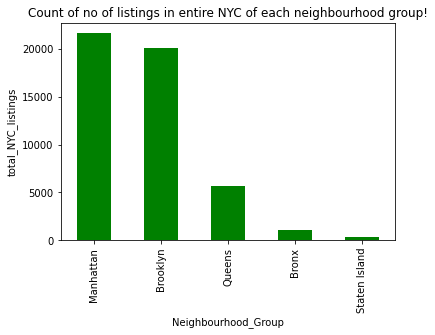

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df['neighbourhood_group'].value_counts().plot(kind='bar',color='g')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

In [ ]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103


As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Michael, David

##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews=areas_reviews.sort_values('number_of_reviews',ascending =False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


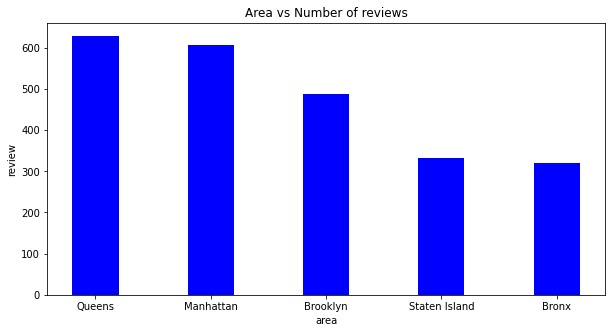

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='blue',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

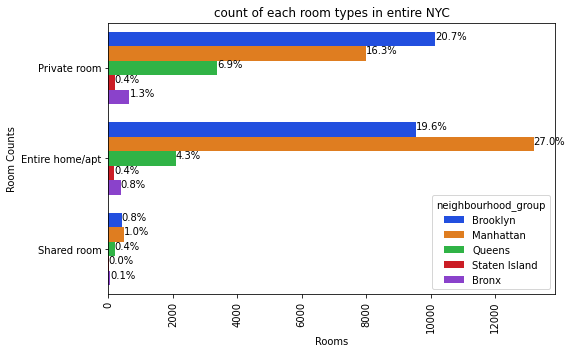

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. <br>

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.<br>

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx. 

In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


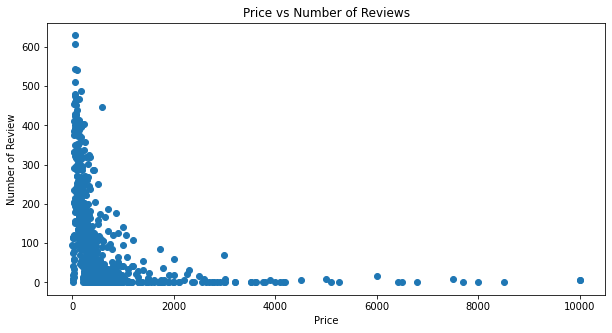

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##According to our data Analysis we can find that most of the people prefer to stay in place where **price is less.**

##3.Which hosts are the busiest and why?

In [ ]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


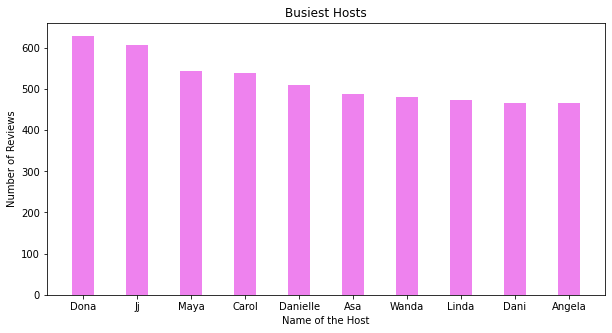

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='violet',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

##Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.


##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas 

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


###From the Above Analysis We can Stay that People are **preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens** and people are preferring listings which are **less in price.**

# 5. finding the customer behavior of spending minimum nights in different price segments?

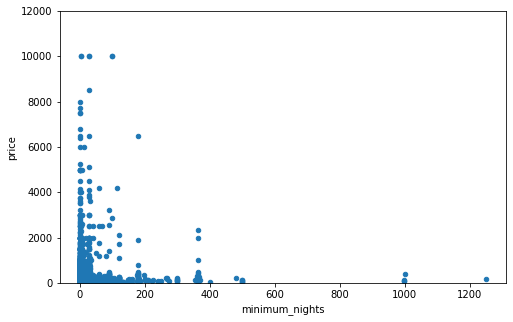

In [ ]:
# price vs minimum_nights

min_night='minimum_nights'

data=pd.concat([df['price'],df[min_night]],axis=1)

data.plot.scatter(x=min_night,y='price',ylim=(0,12000)) #plotting a scatter plot.

#Customer likes to spend minimum nights at higher room prices.


Here we can see many data points are clustered on 0 price range, few have min nights for stay but price is 0. 

looks like **price factor matters.**



Density near minimum nights is higher near 0 because the price is too high.

# 6.Room_types vs price on different neighbourhood groups!

In [ ]:
df['room_type'].unique() #unique rooms available throughout NYC

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

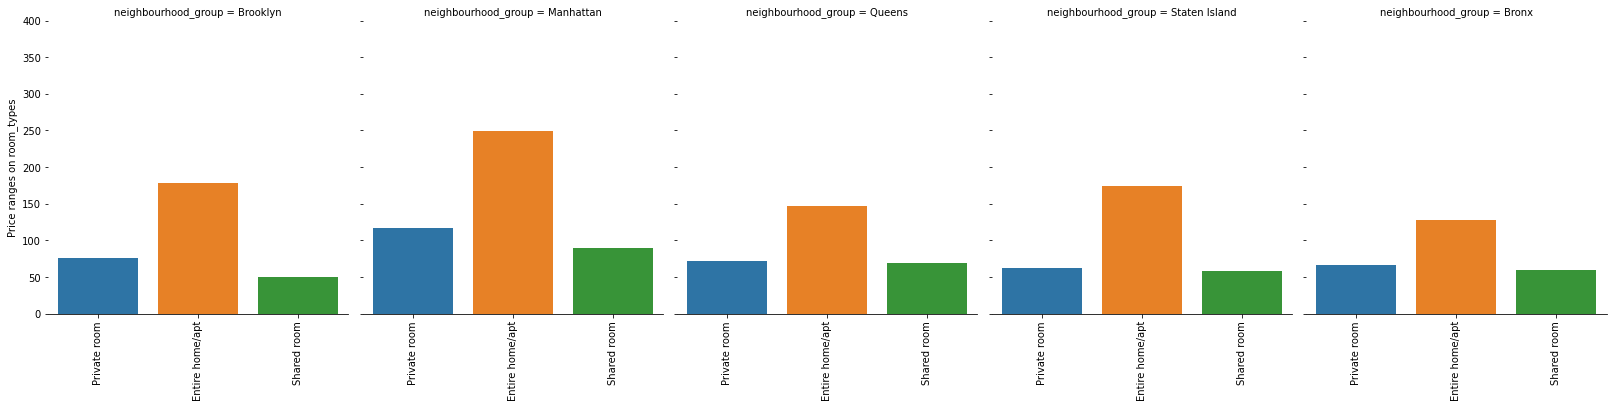

In [ ]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 


it Looks like a property/listing with **Entire home/apt** as room_type wins in number of booking at NYC followed by private rooms. <br>

**Manhattan** has the highest price for room types with **Entire home/apt**  ranging to nearly 240 USD/night, followed by **Private room** with 110 USD/night. And it's  being the most expensive place to live in!

# 7. what is the relation between availability and different neighbourhood groups?

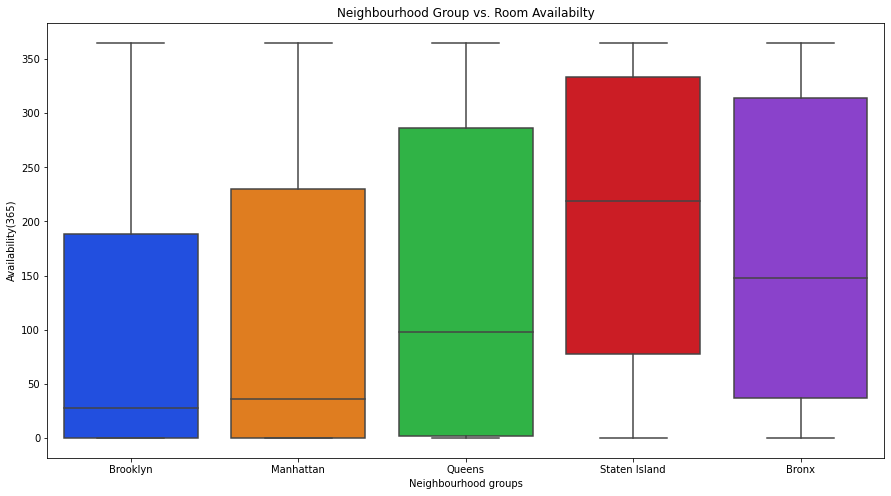

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by **Bronx** where every listings are available for 150 on an average every year.

# 8.  what can be done with latitude and longitude?

In [ ]:
min_th,max_th= df.price.quantile([0.01,0.999]) #min and max threshold from price column using quantile approach 
df_pnw= df[(df.price>min_th)&(df.price<max_th)]

Text(0.5, 1.0, 'Location Co-ordinates')

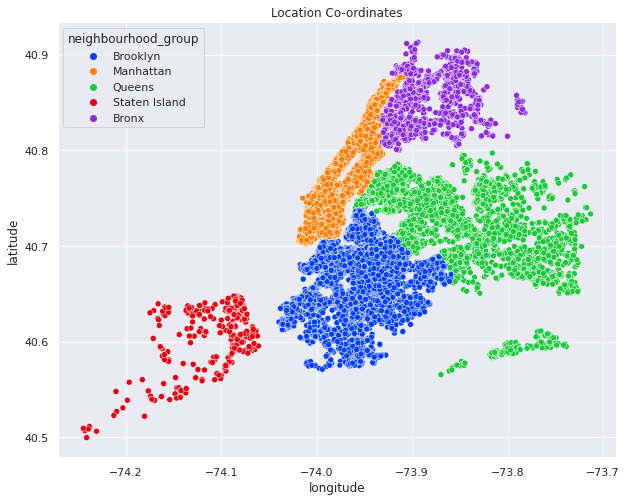

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_pnw, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

# **Conclusion**



We have reached almost the end of the analysis. There might be few analysis which can be done more. <br>

we analysed **'price'** and also checked with the most correlated variables, we dealt with **missing data**, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.


###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###5. If people are not staying more then one night means they are travellers.

# **Thanks! **